Found 800 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/20
25/25 [==============================] - 92s 4s/step - loss: 0.7798 - accuracy: 0.5213 - val_loss: 0.6952 - val_accuracy: 0.5625
Epoch 2/20
25/25 [==============================] - 96s 4s/step - loss: 0.6930 - accuracy: 0.5525 - val_loss: 0.6968 - val_accuracy: 0.4688
Epoch 3/20
25/25 [==============================] - 93s 4s/step - loss: 0.6765 - accuracy: 0.5400 - val_loss: 0.6838 - val_accuracy: 0.5625
Epoch 4/20
25/25 [==============================] - 92s 4s/step - loss: 0.6544 - accuracy: 0.6050 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 5/20
25/25 [==============================] - 103s 4s/step - loss: 0.6643 - accuracy: 0.5962 - val_loss: 0.6627 - val_accuracy: 0.6562
Epoch 6/20
25/25 [==============================] - 98s 4s/step - loss: 0.6270 - accuracy: 0.6513 - val_loss: 0.6690 - val_accuracy: 0.6250
Epoch 7/20
25/25 [===================

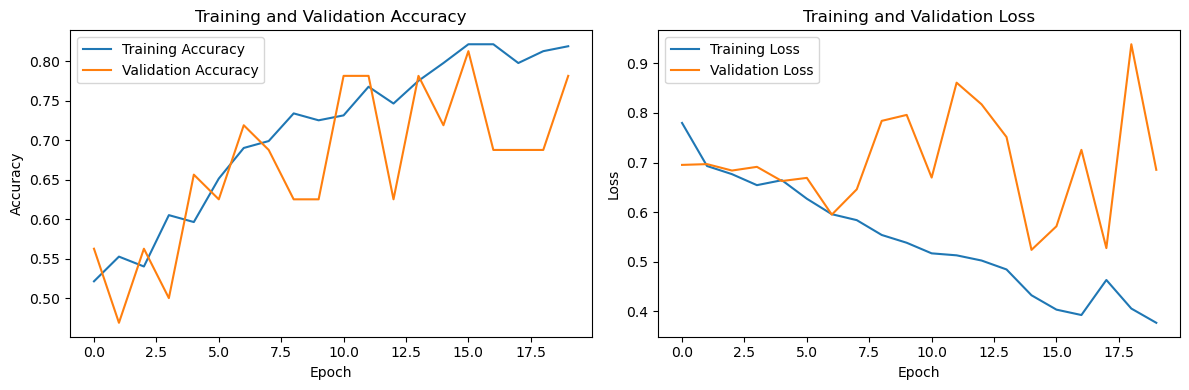

In [1]:
#import necessary libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical

# Define constants
IMAGE_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 20

# Load and preprocess data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion matrix and classification report
test_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
class_report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
